<a href="https://colab.research.google.com/github/AjayB08/Neural_Networks/blob/main/Multiclass_classification_using_NN_with_one_hidden_layer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Download data from google drive
!gdown 1dLOPwh01o3k8p_hK633ixhD1ehz6nNWk

Downloading...
From: https://drive.google.com/uc?id=1dLOPwh01o3k8p_hK633ixhD1ehz6nNWk
To: /content/spiral.csv
100% 12.9k/12.9k [00:00<00:00, 49.5MB/s]


In [ ]:
#Read data and store into dataframe
df = pd.read_csv("spiral.csv")
df.head(5)

,x1,x2,y
0,0.000000,0.000000,0
1,-0.000650,0.010080,0
2,0.009809,0.017661,0
3,0.007487,0.029364,0
4,-0.000027,0.040404,0


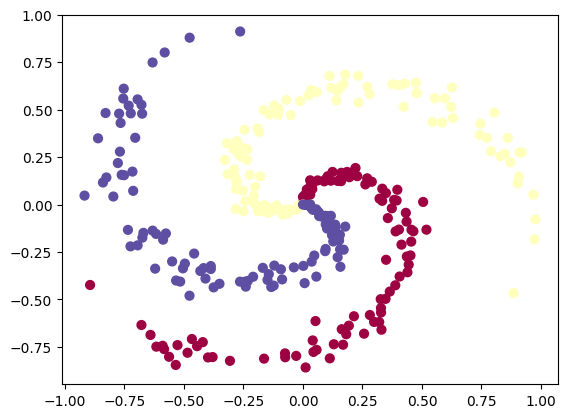

In [ ]:
# scatter plot input attributes based on y attributes
plt.scatter(df["x1"], df["x2"], c=df["y"], s=40, cmap=plt.cm.Spectral)
plt.show()

In [ ]:
#Separate feature and label column
x = df.iloc[:,:-1].to_numpy()
y = df.iloc[:,-1].to_numpy()

print("feature dimensions : ", x.shape, " label dimensions : ", y.shape)

feature dimensions :  (300, 2)  label dimensions :  (300,)


In [ ]:
#Calculate shape
d = x.shape[1] #Number of features
m = x.shape[0] #Number of datapoints /samples
n = len(np.unique(y)) #Number of labels/output categories
h = 4 # Number of lables in hidden layer
print(f"Features: {d}, Samples : {m}, Lables : {n}")

Features: 2, Samples : 300, Lables : 3


*   Here we are considering 4 labels in hidden layer.
*   We have 2 feature as input and 4 labels for the hidden layer. So, total weights for hidden layer (2x4) = 8 and bias = 4
*   In the output layer we have 3 labels and 4 inputs. So, total weigths for output layer (4x3) = 12 and bias = 3

*   We are using ReLU as activation function for hidden layer and softmax as activation function for output layer.







In [ ]:
#Intialize parameters randomly
w1 = 0.01*np.random.randn(d,h)
b1 = np.zeros((1,h))
w2 = 0.01*np.random.randn(h,n)
b2 = np.zeros((1,n))

##Forward Propogation

In [ ]:
#Calculate Z1 and A1
Z1 = np.dot(x, w1) + b1 #(300,2)*(2,4) + (1,4) => (300,4)
A1 = np.maximum(0, Z1) #ReLU, if Z1 < 0 then A1 = 0 else A1 = Z1

In [ ]:
#Calculate Z2 and A2
Z2 = np.dot(A1, w2) + b2 # (300,4)*(4,3) + (1,3) => (300,3)
exp_z = np.exp(Z2)
A2 = exp_z/np.sum(exp_z, axis=1, keepdims=True) #Applying softmax as actibation function for output layer

In [ ]:
probs = A2

##Backword Propogation

In [ ]:
#Calculate dZ2
#dZ2 = (pi - I(i=y)) =>  simulation of One hot encoding for labels
dZ2 = probs
dZ2[range(m), y] -= 1

print(dZ2.shape)

(300, 3)


dw2 shape should be same as w2, i.e (4,3). We know that shape of dZ2 = (300, 3) and shape of A1 = (300,4). So, to do matrix multiplication of dZ2 and A1 to get w2's shape, we need to transpose A1 and then perform dot product.

In [ ]:
#Calculate dw2 and db2
#dw2 = dZ2*A1 and db2 = dZ2
dw2 = np.dot(A1.T, dZ2) /m #divide by m, because we are using GD and as per formula Wnew = W - lr*summation(dw)/m
db2 = np.sum(dZ2, axis=0, keepdims=True)/m

In [ ]:
#Calculate dA1
#dA1 = dZ2*W2
dA1 = np.dot(dZ2, w2.T) # (300,4)*(4,3) => (300,3)

In [ ]:
#Calculate dZ1
#dZ1 = dA1*d/dZ1((ReLU(Z1))) => d/dZ1(ReLu(Z1)) is 0 for 0 else 1 for z1
dZ1 = dA1
dZ1[Z1<=0] =0

In [ ]:
#Calculate dw1 and db1
#dw1 = dz1*x = db1 = dz1
dw1 = np.dot(x.T, dZ1)/m  #(2,300)*(300,4) => (2,4)
db1 = np.sum(dZ1, axis=0, keepdims=True)/m

In [ ]:
#Update parameter
lr = 0.1 #learing rate
w1 += -lr*dw1
b1 += -lr*db1
w2 += -lr*dw2
b2 += -lr*db2

print(f"New w1 : {w1}, New b1 : {b1}, New w2 : {w2}, New b2 : {b2}")

New w1 : [[-0.01606301 -0.01063101 -0.00810312  0.01226729]
 [-0.01670315 -0.01279693  0.00655324  0.01045616]], New b1 : [[-4.49681133e-05  3.31586094e-05 -9.65977859e-05 -2.16746045e-04]], New w2 : [[-0.00777971 -0.01185835 -0.01550089]
 [ 0.0044565  -0.00889723 -0.00070699]
 [ 0.00840947 -0.00260866 -0.00146738]
 [-0.01916445  0.00046398  0.02008234]], New b2 : [[ 3.70074521e-08  9.41602731e-07 -9.78610183e-07]]


#NN Class

In [ ]:
class NN:
  def __init__(self, n_features, n_hidden, n_classes):
    self.d = n_features
    self.h = n_hidden
    self.n = n_classes
    self.w1 = 0.01*np.random.randn(self.d,self.h)
    self.b1 = np.zeros((1,self.h))
    self.w2 = 0.01*np.random.randn(self.h,self.n)
    self.b2 = np.zeros((1,self.n))

  def fwd_prop(self, x):
    Z1 = np.dot(x, self.w1) + self.b1
    A1 = np.maximum(0,Z1)
    Z2 = np.dot(A1, self.w2) + self.b2
    exp_z = np.exp(Z2)
    A2 = exp_z/np.sum(exp_z, axis=1, keepdims=True)
    return A1, A2

  def back_prop(self, x, A1, A2, y):
    total_samples = y.shape[0]
    dZ2 = A2
    dZ2[range(total_samples), y] -= 1
    dZ2 /= total_samples
    dw2 = np.dot(A1.T, dZ2)
    db2 = np.sum(dZ2, axis=0, keepdims=True)
    dA1 = np.dot(dZ2, self.w2.T)
    dA1[A1<=0] = 0
    dZ1 = dA1
    dw1 = np.dot(x.T, dZ1)
    db1 = np.sum(dZ1, axis=0, keepdims=True)
    return dw1, db1, dw2, db2

  def cce_loss(self, y, probs):
    total_samples = y.shape[0]
    correct_logprobs = -np.log(probs[range(total_samples), y])
    loss = np.sum(correct_logprobs)/total_samples
    return loss

  def predict(self, x):
    A1 = np.maximum(0, np.dot(x, self.w1) + self.b1)
    Z2 = np.dot(A1, self.w2) + self.b2
    y_hat = np.argmax(Z2, axis=1)
    return y_hat

  def fit(self, x, lr, reg, max_iters):
    total_samples = x.shape[0]
    for i in range(max_iters):
      #forward propogation
      A1, A2 = self.fwd_prop(x)

      #Calculate loss
      data_loss = self.cce_loss(y,A2)
      reg_loss = 0.5*reg*np.sum(self.w1*self.w1) + 0.5*reg*np.sum(self.w2*self.w2)
      total_loss = data_loss + reg_loss

      if i % 1000 == 0:
        print("iteration %d: loss %f" % (i, total_loss))

      #Backward propogation
      dw1, db1, dw2, db2 = self.back_prop(x, A1, A2, y)

      # add regularization gradient contribution
      dw2 += reg * self.w2
      dw1 += reg * self.w1

      #Update parameters
      self.w1 += -lr*dw1
      self.b1 += -lr*db1
      self.w2 += -lr*dw2
      self.b2 += -lr*db2


In [ ]:
nn_model = NN(n_features=2, n_hidden=100, n_classes=3)
nn_model.fit(x, lr=1, reg=1e-3, max_iters=10000)
print('training accuracy: %.2f' % (np.mean(nn_model.predict(x) == y)))

iteration 0: loss 1.098709
iteration 1000: loss 0.320793
iteration 2000: loss 0.252694
iteration 3000: loss 0.248852
iteration 4000: loss 0.248083
iteration 5000: loss 0.247530
iteration 6000: loss 0.247268
iteration 7000: loss 0.247141
iteration 8000: loss 0.247071
iteration 9000: loss 0.247043
training accuracy: 0.99


###Counter plot result

In [ ]:
#Create 2-D grid
step=0.02
x_min, x_max = x[:,0].min()-1, x[:,0].max()+1
y_min, y_max = x[:,1].min()-1, x[:,1].max()+1
xx, yy = np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))

In [ ]:
#Predicts all points in the grid
y_hat = nn_model.predict(np.c_[xx.ravel(), yy.ravel()])
y_hat = y_hat.reshape(xx.shape)

<ipython-input-88-701e8e9e26bb>:2: UserWarning: The following kwargs were not used by contour: 'cmp'
  plt.contourf(xx, yy, y_hat, cmp=plt.cm.Spectral, alpha=0.8)


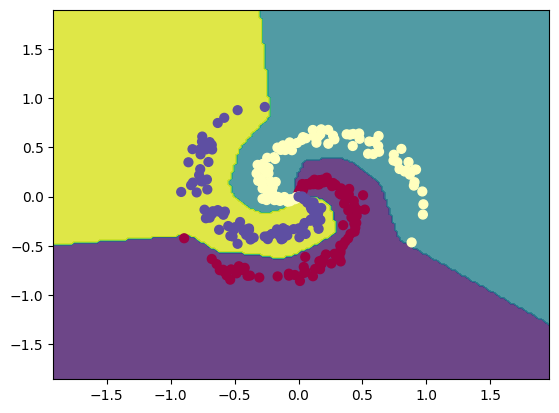

In [ ]:
plt.figure()
plt.contourf(xx, yy, y_hat, cmp=plt.cm.Spectral, alpha=0.8)
plt.scatter(x[:,0], x[:,1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()